<a href="https://colab.research.google.com/github/chaki786/supermarket-/blob/main/supermarket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
import pandas as pd

# Google Sheet CSV Link
sheet_url = "https://docs.google.com/spreadsheets/d/1pxKxiFW-a_mvVmaA1W1UATx_LPMPahM3UhAtPUKA8yg/gviz/tq?tqx=out:csv&sheet=Sheet1"

# Read CSV
df = pd.read_csv(sheet_url)

# Show first 5 rows
df.head()


,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [108]:
print(df.columns)


Index(['Order ID', 'Customer Name', 'Category', 'Sub Category', 'City',
       'Order Date', 'Region', 'Sales', 'Discount', 'Profit', 'State'],
      dtype='object')


In [109]:
df = df.fillna('')  # Replace NaN with empty string


In [110]:

df = df[['Order ID', 'Customer Name', 'Category', 'Sub Category', 'City',
         'Order Date', 'Region', 'Sales', 'Discount', 'Profit', 'State']]

df.rename(columns={"Order ID": "Order_ID", "Customer Name": "Customer_Name"}, inplace=True)


In [111]:
# Date ko Convert karo
df["Order Date"] = pd.to_datetime(df["Order Date"], dayfirst=False, errors='coerce')

# Confirm Format
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order_ID       9994 non-null   object        
 1   Customer_Name  9994 non-null   object        
 2   Category       9994 non-null   object        
 3   Sub Category   9994 non-null   object        
 4   City           9994 non-null   object        
 5   Order Date     4042 non-null   datetime64[ns]
 6   Region         9994 non-null   object        
 7   Sales          9994 non-null   int64         
 8   Discount       9994 non-null   float64       
 9   Profit         9994 non-null   float64       
 10  State          9994 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 859.0+ KB
None


In [112]:
import numpy as np
from datetime import datetime, timedelta

# Random Date Generate (Jan 2022 - Dec 2023)
df["Order Date"] = pd.to_datetime(np.random.choice(pd.date_range("2022-01-01", "2023-12-31"), len(df)))

print(df.head())


  Order_ID Customer_Name          Category      Sub Category         City  \
0      OD1        Harish      Oil & Masala           Masalas      Vellore   
1      OD2         Sudha         Beverages     Health Drinks  Krishnagiri   
2      OD3       Hussain       Food Grains      Atta & Flour   Perambalur   
3      OD4       Jackson  Fruits & Veggies  Fresh Vegetables   Dharmapuri   
4      OD5       Ridhesh       Food Grains   Organic Staples         Ooty   

  Order Date Region  Sales  Discount  Profit       State  
0 2023-10-30  North   1254      0.12  401.28  Tamil Nadu  
1 2022-05-05  South    749      0.18  149.80  Tamil Nadu  
2 2023-07-22   West   2360      0.21  165.20  Tamil Nadu  
3 2022-07-11  South    896      0.25   89.60  Tamil Nadu  
4 2023-02-24  South   2355      0.26  918.45  Tamil Nadu  


<ipython-input-113-b7b9a7d48fd5>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Month", y="Sales", data=df, estimator=sum, ci=None)


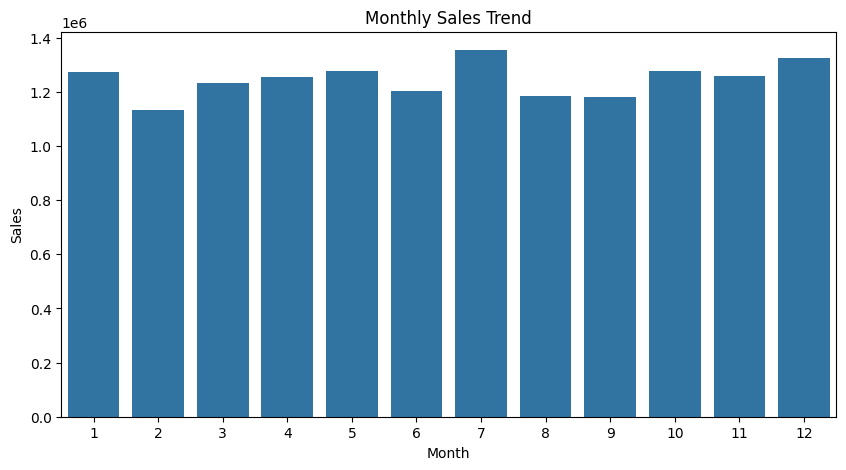

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

# Month aur Year Extract karo
df["Year"] = df["Order Date"].dt.year
df["Month"] = df["Order Date"].dt.month

# Monthly Sales Analysis
plt.figure(figsize=(10, 5))
sns.barplot(x="Month", y="Sales", data=df, estimator=sum, ci=None)
plt.title("Monthly Sales Trend")
plt.show()


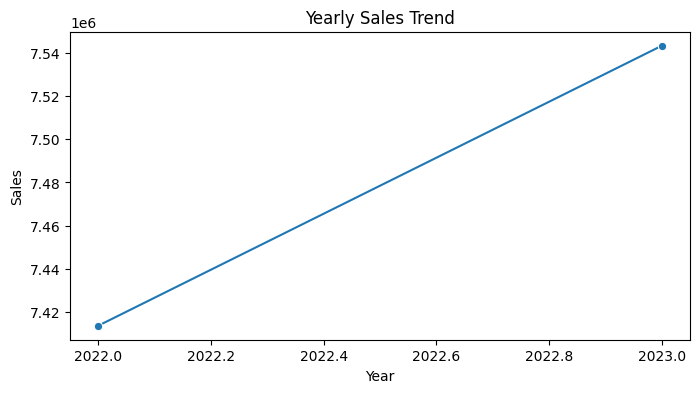

In [114]:
# Yearly Sales Calculation
yearly_sales = df.groupby("Year")["Sales"].sum().reset_index()

# Line Chart
plt.figure(figsize=(8, 4))
sns.lineplot(x="Year", y="Sales", data=yearly_sales, marker="o")
plt.title("Yearly Sales Trend")
plt.show()


<ipython-input-115-ee533370b8e3>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Region", y="Sales", data=df, estimator=sum, ci=None)


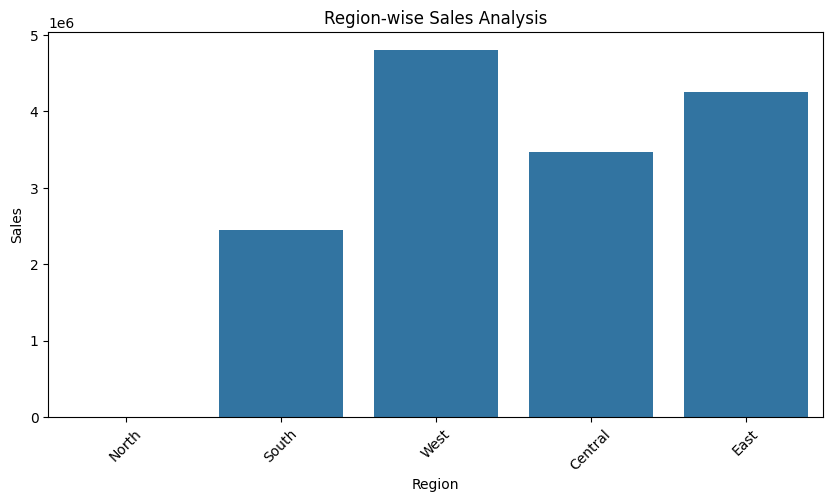

In [115]:
plt.figure(figsize=(10, 5))
sns.barplot(x="Region", y="Sales", data=df, estimator=sum, ci=None)
plt.title("Region-wise Sales Analysis")
plt.xticks(rotation=45)
plt.show()


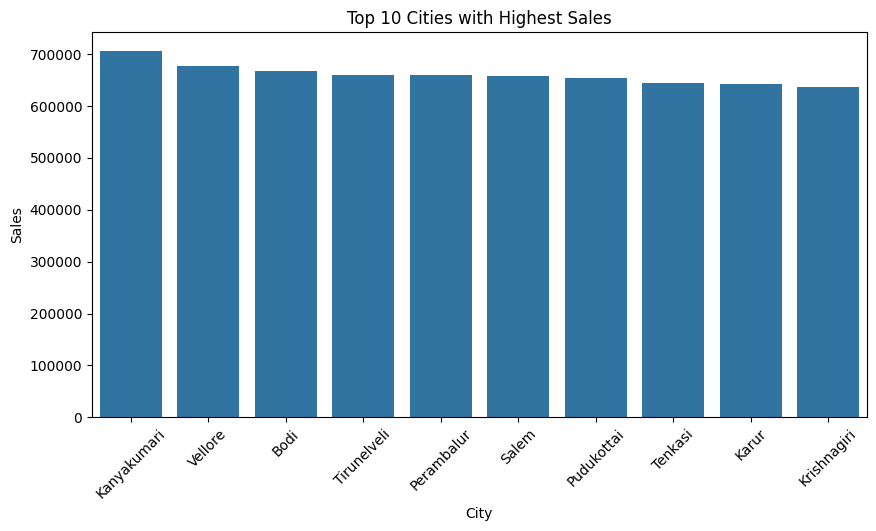

In [116]:
# Top 10 Cities
top_cities = df.groupby("City")["Sales"].sum().reset_index().sort_values(by="Sales", ascending=False).head(10)

# Bar Chart
plt.figure(figsize=(10, 5))
sns.barplot(x="City", y="Sales", data=top_cities)
plt.xticks(rotation=45)
plt.title("Top 10 Cities with Highest Sales")
plt.show()


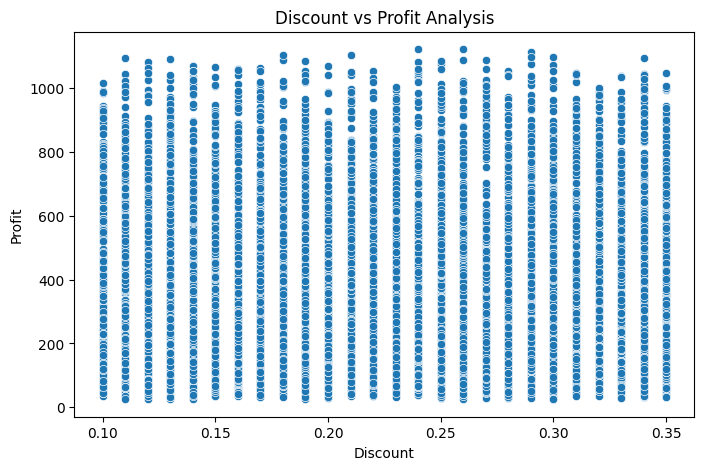

In [117]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x="Discount", y="Profit", data=df)
plt.title("Discount vs Profit Analysis")
plt.show()


<ipython-input-118-42ca89b8e6eb>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Sub Category", y="Sales", data=df, estimator=sum, ci=None)


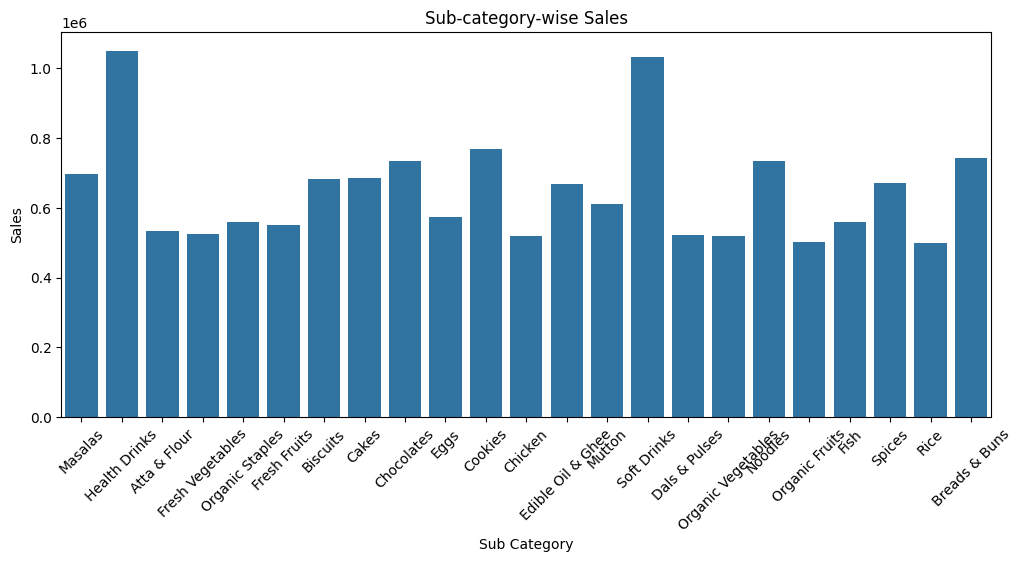

In [118]:
plt.figure(figsize=(12, 5))
sns.barplot(x="Sub Category", y="Sales", data=df, estimator=sum, ci=None)
plt.xticks(rotation=45)
plt.title("Sub-category-wise Sales")
plt.show()


In [119]:
df.to_csv("/content/supermarket_cleaned.csv", index=False)


In [120]:
!pip install mysql-connector-python


In [121]:
!pip install python-dotenv


In [122]:
import mysql.connector

# MySQL Connection
conn = mysql.connector.connect(
    host="bz0z3aamw7bganvyuzam-mysql.services.clever-cloud.com",
    user="uqu1w4kiq5sfpjml",
    password="Zd7Ydqz2yu00psANOYxh",
    database="bz0z3aamw7bganvyuzam"
)

cursor = conn.cursor()

# Table create query
create_table_query = """
CREATE TABLE IF NOT EXISTS supermarket_sales (
    InvoiceID VARCHAR(50) PRIMARY KEY,
    Branch VARCHAR(10),
    City VARCHAR(50),
    Customer_type VARCHAR(20),
    Gender VARCHAR(10),
    Product_line VARCHAR(100),
    Unit_price FLOAT,
    Quantity INT,
    Tax FLOAT,
    Total FLOAT,
    Date DATE,
    Time TIME,
    Payment_method VARCHAR(20),
    COGS FLOAT,
    Gross_margin_percentage FLOAT,
    Gross_income FLOAT,
    Rating FLOAT
);
"""

cursor.execute(create_table_query)
conn.commit()
print("✅ Table Created Successfully!")

# Close connection
cursor.close()
conn.close()


✅ Table Created Successfully!


In [123]:
import mysql.connector
import pandas as pd
import numpy as np

# 📌 MySQL Connection
conn = mysql.connector.connect(
    host="bz0z3aamw7bganvyuzam-mysql.services.clever-cloud.com",
    user="uqu1w4kiq5sfpjml",
    password="Zd7Ydqz2yu00psANOYxh",
    database="bz0z3aamw7bganvyuzam"
)
cursor = conn.cursor()

# 📌 Google Sheet CSV Link
sheet_url = "https://docs.google.com/spreadsheets/d/1pxKxiFW-a_mvVmaA1W1UATx_LPMPahM3UhAtPUKA8yg/gviz/tq?tqx=out:csv&sheet=Sheet1"

# 📌 CSV File Load Karo
df = pd.read_csv(sheet_url)

# 📌 Date Column ko Convert Karo
df["Order Date"] = pd.to_datetime(df["Order Date"], errors='coerce')

# 📌 `datetime64` ko `str` me Convert Karo (MySQL Compatibility)
df["Order Date"] = df["Order Date"].dt.strftime('%Y-%m-%d')

# ✅ **Convert `NaN` & Empty Strings to `None` (NULL in MySQL)**
df.replace({"Order Date": {"": None}}, inplace=True)
df = df.where(pd.notnull(df), None)  # Replace NaN with None

# 📌 SQL Query Prepare Karo
insert_query = """
INSERT INTO sales_data (Order_ID, Customer_Name, Category, Sub_Category, City, Order_Date, Region, Sales, Discount, Profit, State)
VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
"""

# 📌 Data Insert Karo
for _, row in df.iterrows():
    cursor.execute(insert_query, tuple(row))

conn.commit()
cursor.close()
conn.close()

print("✅ Data Successfully Inserted!")


KeyboardInterrupt: 